### Telecom Churn Data
We will use 21 variables related to customer behaviour (such as the monthly bill, internet usage etc.) to predict whether a particular customer will switch to another telecom provider or not (i.e. churn or not).

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('churn_data.csv')
df2 = pd.read_csv('customer_data.csv')
df3 = pd.read_csv('internet_data.csv')

In [3]:
df1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
df3.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [6]:
df4 = pd.merge(df1, df2, how = 'inner', on = 'customerID')

In [7]:
df = pd.merge(df4, df3, how = 'inner', on = 'customerID')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [8]:
# Dropping 'customerID' since we won't need it anymore
df.drop('customerID', axis = 1, inplace = True)

In [9]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [11]:
df['TotalCharges'] = df['TotalCharges'].convert_objects(convert_numeric = True)

In [12]:
bin_var = [i for i in df.select_dtypes(include = 'object').columns if df[i].nunique() == 2]
bin_var

['PhoneService',
 'PaperlessBilling',
 'Churn',
 'gender',
 'Partner',
 'Dependents']

In [13]:
for i in bin_var:
    print(i, df[i].unique())

PhoneService ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Churn ['No' 'Yes']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']


We see that except 'gender' variable, all the other variables have 'Yes' and 'No' data values. Therefore, we can use the same function to convert them to numbers and a seperate function for 'gender' variable.

In [14]:
for i in list(set(bin_var).difference({'gender'})):
    df[i] = df[i].apply(lambda x : 1 if x.lower() == 'yes' else 0)

In [15]:
df['Male'] = df['gender'].apply(lambda x : 1 if x.lower() == 'male' else 0)
df.drop('gender', axis = 1, inplace = True)

In [16]:
df.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Male
0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0
1,34,1,One year,0,Mailed check,56.95,1889.50,0,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1
2,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,0,No,DSL,Yes,Yes,No,No,No,No,1
3,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1
4,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,No,Fiber optic,No,No,No,No,No,No,0


In [17]:
tri_var = [i for i in df.select_dtypes(include = 'object').columns if df[i].nunique() > 2]
for i in tri_var:
    print(i, df[i].nunique())

Contract 3
PaymentMethod 4
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3


In [18]:
dummy = pd.get_dummies(df[tri_var], drop_first = True)
df = pd.concat([df, dummy], axis = 1)

In [19]:
df.drop(tri_var, axis = 1, inplace = True)

In [20]:
df.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Male,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2,1,1,53.85,108.15,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,45,0,0,42.30,1840.75,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
4,2,1,1,70.70,151.65,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.shape

(7043, 31)

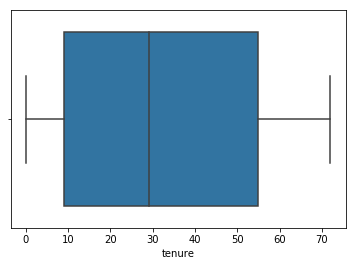

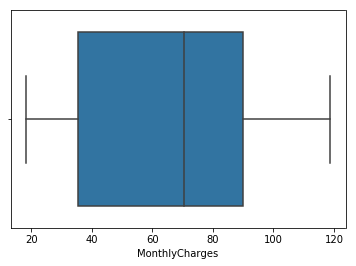

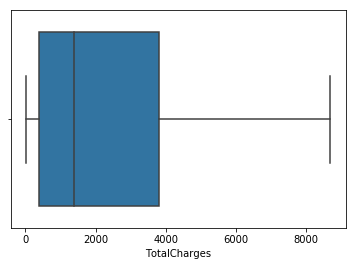

In [22]:
# Checking outliers
for i in df.select_dtypes(exclude = 'object').columns:
    if df[i].nunique() > 2:
        sns.boxplot(df[i])
        plt.show()

In [23]:
df.isnull().sum()

tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Male                                      0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                

Since 11 rows out of 7043 rows have null values, it's better to drop them than to extrapolate values for them.

In [24]:
df.dropna(inplace = True)

In [25]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop('Churn', axis = 1)

In [27]:
y = df['Churn']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
X_train[[i for i in df.select_dtypes(exclude = 'object').columns if df[i].nunique() > 2]] = scaler.fit_transform(X_train[[i for i in df.select_dtypes(exclude = 'object').columns if df[i].nunique() > 2]])

In [31]:
X_test[[i for i in df.select_dtypes(exclude = 'object').columns if df[i].nunique() > 2]] = scaler.transform(X_test[[i for i in df.select_dtypes(exclude = 'object').columns if df[i].nunique() > 2]])

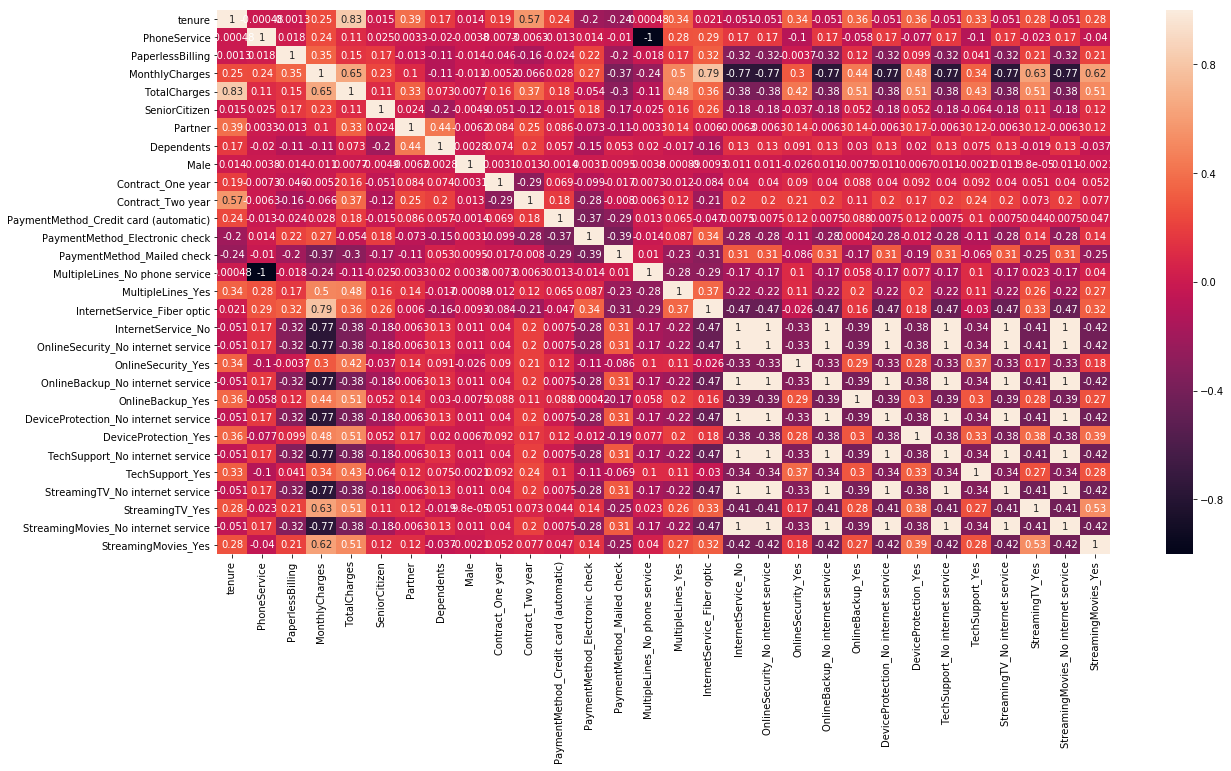

In [32]:
plt.figure(figsize = (20, 10))
sns.heatmap(X_train.corr(), annot = True)

We see a strange behaviour in correlation table. Some variables have perfectly high correlation and hence these are redundant variables. We need to drop them but not yet.

In [33]:
# Model Building
import statsmodels.api as sm
classifier1 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
classifier1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 20 Jan 2020   Deviance:                       4009.4
Time:                        23:35:55   Pearson chi2:                 6.07e+03
No. Iterations:                    18   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3085      0.773     -2.986      0.003      -3.824      -0.793
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                             -0.6789      0.090     -7.510      0.000      -0.856      -0.502
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Male                                     -0.0346      0.078     -0.442      0.658      -0.188       0.119
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
MultipleLines_No phone service           -1.6296      0.776     -2.101      0.036      -3.150      -0.109
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -0.3970      0.140     -2.831      0.005      -0.672      -0.122
OnlineSecurity_No internet service       -0.3970      0.140     -2.831      0.005      -0.672      -0.122
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_No internet service         -0.3970      0.140     -2.831      0.005      -0.672      -0.122
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_No internet service     -0.3970      0.140     -2.831      0.005      -0.672      -0.122
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_No internet service          -0.3970      0.140     -2.831      0.005      -0.672      -0.122
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -

In [34]:
# Feature selection using RFE
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [35]:
# Selecting top 15 features
from sklearn.feature_selection import RFE
rfe = RFE(log_reg, 15)
rfe = rfe.fit(X_train, y_train)

In [36]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False, False,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
       False, False, False])

In [37]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 13),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 15),
 ('Dependents', False, 11),
 ('Male', False, 14),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 8),
 ('PaymentMethod_Mailed check', True, 1),
 ('MultipleLines_No phone service', False, 7),
 ('MultipleLines_Yes', False, 4),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('OnlineSecurity_No internet service', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_No internet service', False, 3),
 ('OnlineBackup_Yes', False, 6),
 ('DeviceProtection_No internet service', False, 5),
 ('DeviceProtection_Yes', False, 16),
 ('TechSupport_No internet service', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_No internet service', True, 1),
 ('St

In [38]:
cols = X_train.columns[rfe.support_]

In [39]:
# Features not in the top 15
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents', 'Male',
       'PaymentMethod_Electronic check', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes'],
      dtype='object')

In [40]:
X_train_sm = sm.add_constant(X_train[cols])
classifier2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
classifier2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2018.4
Date:                Mon, 20 Jan 2020   Deviance:                       4036.8
Time:                        23:35:56   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8627      0.164     -5.267      0.000      -1.184      -0.542
tenure                                   -1.6754      0.181     -9.273      0.000      -2.029      -1.321
PhoneService                             -0.5231      0.158     -3.302      0.001      -0.834      -0.213
PaperlessBilling                          0.3638      0.089      4.073      0.000       0.189       0.539
TotalCharges                              0.9399      0.178      5.276      0.000       0.591       1.289
SeniorCitizen                             0.4394      0.099      4.443      0.000       0.246       0.633
Contract_One year                        -0.6737      0.127     -5.305      0.000      -0.923      -0.425
Contract_Two year                        -1.2736      0.212     -6.020      0.000      -1.688      -0.859
PaymentMethod_Credit card (automatic)    -0.3885      0.112     -3.462      0.001      -0.609      -0.169
PaymentMethod_Mailed check               -0.4164      0.110     -3.773      0.000      -0.633      -0.200
InternetService_Fiber optic               0.7683      0.117      6.549      0.000       0.538       0.998
InternetService_No                       -0.3307      0.055     -5.995      0.000      -0.439      -0.223
OnlineSecurity_No internet service       -0.3307      0.055     -5.995      0.000      -0.439      -0.223
OnlineSecurity_Yes                       -0.4309      0.101     -4.246      0.000      -0.630      -0.232
TechSupport_Yes                          -0.3921      0.101     -3.877      0.000      -0.590      -0.194
StreamingTV_No internet service          -0.3307      0.055     -5.995      0.000      -0.439      -0.223
=========================================================================================================
"""

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,InternetService_No,inf
11,OnlineSecurity_No internet service,inf
14,StreamingTV_No internet service,inf
1,PhoneService,7.840000
3,TotalCharges,6.720000
0,tenure,6.660000
9,InternetService_Fiber optic,3.910000
6,Contract_Two year,3.210000
2,PaperlessBilling,2.590000
13,TechSupport_Yes,2.060000


In [42]:
X = X_train[cols]

In [43]:
# Dropping 'StreamingMovies_No internet service' since it's VIF == inf
X.drop('InternetService_No', axis = 1, inplace = True)

In [44]:
X_train_sm = sm.add_constant(X)

In [45]:
classifier3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
classifier3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2018.4
Date:                Mon, 20 Jan 2020   Deviance:                       4036.8
Time:                        23:35:56   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8627      0.164     -5.267      0.000      -1.184      -0.542
tenure                                   -1.6754      0.181     -9.273      0.000      -2.029      -1.321
PhoneService                             -0.5231      0.158     -3.302      0.001      -0.834      -0.213
PaperlessBilling                          0.3638      0.089      4.073      0.000       0.189       0.539
TotalCharges                              0.9399      0.178      5.276      0.000       0.591       1.289
SeniorCitizen                             0.4394      0.099      4.443      0.000       0.246       0.633
Contract_One year                        -0.6737      0.127     -5.305      0.000      -0.923      -0.425
Contract_Two year                        -1.2736      0.212     -6.020      0.000      -1.688      -0.859
PaymentMethod_Credit card (automatic)    -0.3885      0.112     -3.462      0.001      -0.609      -0.169
PaymentMethod_Mailed check               -0.4164      0.110     -3.773      0.000      -0.633      -0.200
InternetService_Fiber optic               0.7683      0.117      6.549      0.000       0.538       0.998
OnlineSecurity_No internet service       -0.4960      0.083     -5.995      0.000      -0.658      -0.334
OnlineSecurity_Yes                       -0.4309      0.101     -4.246      0.000      -0.630      -0.232
TechSupport_Yes                          -0.3921      0.101     -3.877      0.000      -0.590      -0.194
StreamingTV_No internet service          -0.4960      0.083     -5.995      0.000      -0.658      -0.334
=========================================================================================================
"""

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,OnlineSecurity_No internet service,inf
13,StreamingTV_No internet service,inf
1,PhoneService,7.840000
3,TotalCharges,6.720000
0,tenure,6.660000
9,InternetService_Fiber optic,3.910000
6,Contract_Two year,3.210000
2,PaperlessBilling,2.590000
12,TechSupport_Yes,2.060000
11,OnlineSecurity_Yes,1.900000


In [47]:
# Dropping 'OnlineSecurity_No internet service' since it's VIF == inf
X.drop('OnlineSecurity_No internet service', axis = 1, inplace = True)

In [48]:
X_train_sm = sm.add_constant(X)
classifier4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
classifier4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2018.4
Date:                Mon, 20 Jan 2020   Deviance:                       4036.8
Time:                        23:35:56   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8627      0.164     -5.267      0.000      -1.184      -0.542
tenure                                   -1.6754      0.181     -9.273      0.000      -2.029      -1.321
PhoneService                             -0.5231      0.158     -3.302      0.001      -0.834      -0.213
PaperlessBilling                          0.3638      0.089      4.073      0.000       0.189       0.539
TotalCharges                              0.9399      0.178      5.276      0.000       0.591       1.289
SeniorCitizen                             0.4394      0.099      4.443      0.000       0.246       0.633
Contract_One year                        -0.6737      0.127     -5.305      0.000      -0.923      -0.425
Contract_Two year                        -1.2736      0.212     -6.020      0.000      -1.688      -0.859
PaymentMethod_Credit card (automatic)    -0.3885      0.112     -3.462      0.001      -0.609      -0.169
PaymentMethod_Mailed check               -0.4164      0.110     -3.773      0.000      -0.633      -0.200
InternetService_Fiber optic               0.7683      0.117      6.549      0.000       0.538       0.998
OnlineSecurity_Yes                       -0.4309      0.101     -4.246      0.000      -0.630      -0.232
TechSupport_Yes                          -0.3921      0.101     -3.877      0.000      -0.590      -0.194
StreamingTV_No internet service          -0.9920      0.165     -5.995      0.000      -1.316      -0.668
=========================================================================================================
"""

In [49]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,7.84
3,TotalCharges,6.72
0,tenure,6.66
9,InternetService_Fiber optic,3.91
12,StreamingTV_No internet service,3.22
6,Contract_Two year,3.21
2,PaperlessBilling,2.59
11,TechSupport_Yes,2.06
10,OnlineSecurity_Yes,1.90
5,Contract_One year,1.89


In [50]:
# Dropping 'PhoneService' since it's VIF == inf
X.drop('PhoneService', axis = 1, inplace = True)

In [51]:
X_train_sm = sm.add_constant(X)
classifier5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
classifier5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.8
Date:                Mon, 20 Jan 2020   Deviance:                       4047.6
Time:                        23:35:56   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2222      0.124     -9.853      0.000      -1.465      -0.979
tenure                                   -1.5613      0.177     -8.812      0.000      -1.909      -1.214
PaperlessBilling                          0.3665      0.089      4.113      0.000       0.192       0.541
TotalCharges                              0.8271      0.175      4.726      0.000       0.484       1.170
SeniorCitizen                             0.4532      0.099      4.591      0.000       0.260       0.647
Contract_One year                        -0.6743      0.127     -5.316      0.000      -0.923      -0.426
Contract_Two year                        -1.2600      0.211     -5.968      0.000      -1.674      -0.846
PaymentMethod_Credit card (automatic)    -0.3909      0.112     -3.485      0.000      -0.611      -0.171
PaymentMethod_Mailed check               -0.4182      0.110     -3.802      0.000      -0.634      -0.203
InternetService_Fiber optic               0.6408      0.110      5.846      0.000       0.426       0.856
OnlineSecurity_Yes                       -0.4373      0.101     -4.313      0.000      -0.636      -0.239
TechSupport_Yes                          -0.4003      0.101     -3.966      0.000      -0.598      -0.202
StreamingTV_No internet service          -1.1524      0.157     -7.331      0.000      -1.460      -0.844
=========================================================================================================
"""

In [52]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,6.71
0,tenure,6.54
5,Contract_Two year,3.04
8,InternetService_Fiber optic,2.57
11,StreamingTV_No internet service,2.47
1,PaperlessBilling,2.34
10,TechSupport_Yes,1.97
9,OnlineSecurity_Yes,1.79
4,Contract_One year,1.78
7,PaymentMethod_Mailed check,1.66


In [53]:
# Dropping 'TotalCharges' since it's VIF == 7.84
X.drop('TotalCharges', axis = 1, inplace = True)

In [54]:
X_train_sm = sm.add_constant(X)
classifier6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
classifier6_6 = classifier6.fit()
classifier6_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2035.8
Date:                Mon, 20 Jan 2020   Deviance:                       4071.6
Time:                        23:35:57   Pearson chi2:                 5.10e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2679      0.122    -10.420      0.000      -1.506      -1.029
tenure                                   -0.7950      0.061    -13.005      0.000      -0.915      -0.675
PaperlessBilling                          0.3696      0.089      4.163      0.000       0.196       0.544
SeniorCitizen                             0.4672      0.099      4.713      0.000       0.273       0.662
Contract_One year                        -0.6512      0.126     -5.188      0.000      -0.897      -0.405
Contract_Two year                        -1.1988      0.208     -5.769      0.000      -1.606      -0.792
PaymentMethod_Credit card (automatic)    -0.4046      0.112     -3.610      0.000      -0.624      -0.185
PaymentMethod_Mailed check               -0.3796      0.109     -3.482      0.000      -0.593      -0.166
InternetService_Fiber optic               0.9140      0.093      9.802      0.000       0.731       1.097
OnlineSecurity_Yes                       -0.3947      0.101     -3.906      0.000      -0.593      -0.197
TechSupport_Yes                          -0.3224      0.100     -3.236      0.001      -0.518      -0.127
StreamingTV_No internet service          -1.2179      0.155     -7.839      0.000      -1.522      -0.913
=========================================================================================================
"""

In [55]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.99
1,PaperlessBilling,2.31
10,StreamingTV_No internet service,2.06
7,InternetService_Fiber optic,2.01
0,tenure,1.97
9,TechSupport_Yes,1.92
3,Contract_One year,1.78
8,OnlineSecurity_Yes,1.78
6,PaymentMethod_Mailed check,1.66
5,PaymentMethod_Credit card (automatic),1.43


We see that all the VIF and p-values are within permissible limits so we chose the above features as our final set of features and classifier6 as our final model.

In [56]:
final_columns = list(X.columns)

In [57]:
X_train_sm = sm.add_constant(X_train[final_columns])
y_pred = classifier6_6.predict(X_train_sm)

In [58]:
results = pd.DataFrame({'Actual values': y_train, 'Predicted values': y_pred})
results.head()

,Actual values,Predicted values
879,0,0.286192
5790,0,0.242125
6498,1,0.738517
880,1,0.507289
2784,1,0.649882


Let's plot the ROC curve to figure out the optimal value of the threshold.

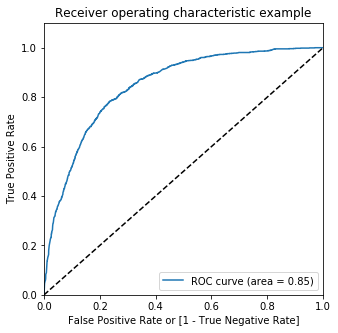

In [89]:
fpr, tpr, thresholds = metrics.roc_curve(results['Actual values'], results['Predicted values'], drop_intermediate = False)
auc_score = metrics.roc_auc_score(results['Actual values'], results['Predicted values'])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Let's create a dataframe that tells us about the prediction of the model based on different cut-off values.

In [96]:
cut_off = pd.DataFrame()
cut_off['Churn'] = results['Actual values']
for i in [j/10 for j in range(11)]:
    cut_off[i] = results['Predicted values'].apply(lambda x : 1 if x > i else 0)
cut_off.head()

,Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
879,0,1,1,1,0,0,0,0,0,0,0,0
5790,0,1,1,1,0,0,0,0,0,0,0,0
6498,1,1,1,1,1,1,1,1,1,0,0,0
880,1,1,1,1,1,1,1,0,0,0,0,0
2784,1,1,1,1,1,1,1,1,0,0,0,0


In [120]:
cut_off2 = pd.DataFrame(columns = ['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])
for i in [j/10 for j in range(0, 11)]:
    c_m = metrics.confusion_matrix(cut_off['Churn'], cut_off[i])
    total = sum(sum(c_m))
    accuracy = (c_m[0,0] + c_m[1,1])/total
    specificity = c_m[0,0]/(c_m[0,0] + c_m[0,1])
    sensitivity = c_m[1,1]/(c_m[1,0] + c_m[1,1])
    cut_off2.loc[i] =[i, accuracy, sensitivity, specificity]
cut_off2

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.261479,1.000000,0.000000
0.1,0.1,0.615400,0.942502,0.499587
0.2,0.2,0.724096,0.851593,0.678955
0.3,0.3,0.768793,0.782440,0.763961
0.4,0.4,0.798456,0.668221,0.844567
0.5,0.5,0.800488,0.525253,0.897937
0.6,0.6,0.796831,0.376068,0.945805
0.7,0.7,0.777733,0.204351,0.980743
0.8,0.8,0.749695,0.048951,0.997799
0.9,0.9,0.738521,0.000000,1.000000


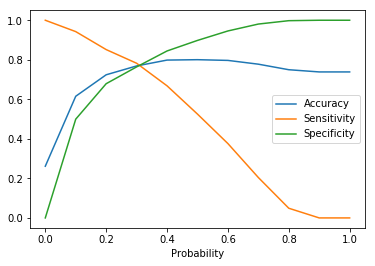

In [124]:
cut_off2.plot.line(x = 'Probability', y = ['Accuracy', 'Sensitivity', 'Specificity'])

We see that for cut-off value nearly equalt to 0.3, the curves intersect.

In [153]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds2 = precision_recall_curve(cut_off['Churn'], results['Predicted values'])

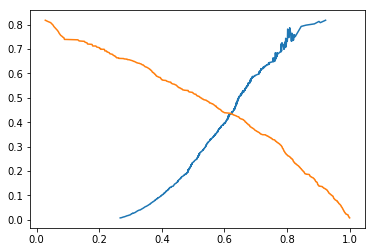

In [157]:
sns.lineplot(precision[:-1], thresholds2)
sns.lineplot(recall[:-1], thresholds2)

Looking at this curve we observe that for the optimal value of the threshold both the precision and the recall have poor values. So we will use threshold of 0.3 only

In [166]:
test_df = pd.DataFrame()
test_df['Probability Predictions'] = classifier6_6.predict(sm.add_constant(X_test[final_columns]))
test_df['Final'] = test_df['Probability Predictions'].apply(lambda x : 1 if x > 0.3 else 0)
test_df['Actual'] = y_test
test_df.head()

,Probability Predictions,Final,Actual
942,0.471894,1,0
3730,0.234474,0,1
1761,0.010495,0,0
2283,0.658974,1,1
1872,0.018710,0,0


In [167]:
metrics.confusion_matrix(test_df['Actual'], test_df['Final'])

array([[1143,  385],
       [ 161,  421]], dtype=int64)

In [169]:
round(metrics.accuracy_score(test_df['Actual'], test_df['Final']), 2)

0.74

In [171]:
# Sensitivity
421/(421+161)

0.7233676975945017

In [172]:
# Sensitivity
1143/(1143+385)

0.7480366492146597

In [174]:
359/(359+223)

0.6168384879725086

In [175]:
(1050/(1050+350))-(1190/(1190+350))

-0.022727272727272707

In [179]:
round(round(1050/(1050+350), 2) - round(1190/(1190+350), 2), 2)

-0.02

In [183]:
1050/(1050+400)

0.7241379310344828